In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller #(Augmented Dickey-Fuller test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # autocorrelation and partial autocorrelation plots
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('avocado.csv')

In [6]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.describe(include='all')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [9]:
# Convert the Date column to a datetime format and set it as the index.
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [10]:
avocado_df = df['AveragePrice']
avocado_df.dropna()

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
              ... 
2018-02-04    1.63
2018-01-28    1.71
2018-01-21    1.87
2018-01-14    1.93
2018-01-07    1.62
Name: AveragePrice, Length: 18249, dtype: float64

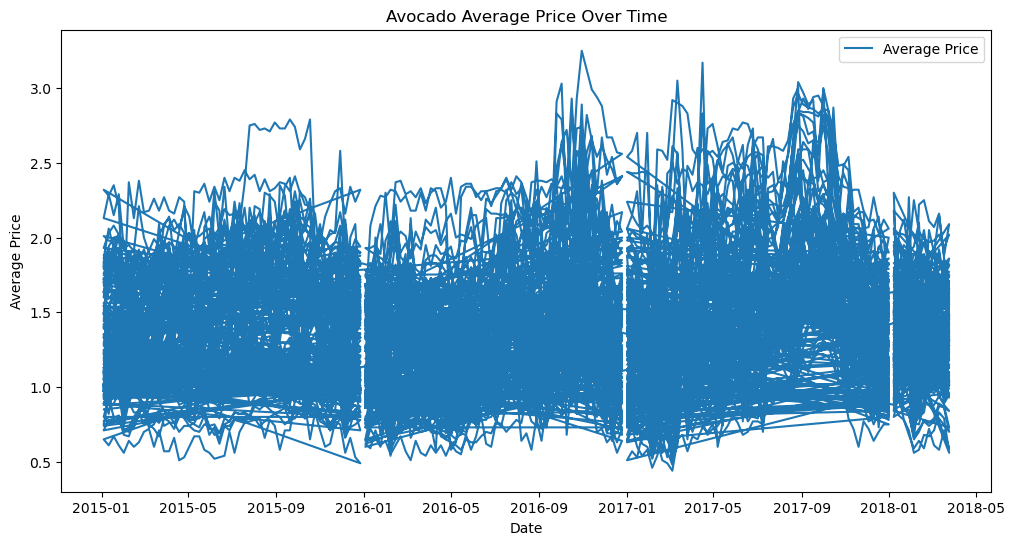

In [11]:
#Plot the time series
plt.figure(figsize=(12,6))
plt.plot(avocado_df, label='Average Price')
plt.title('Avocado Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [12]:
avocado_df_new= avocado_df[:3500] ## as dataset is too high

In [13]:
avocado_df_new

Date
2015-12-27    1.33
2015-12-20    1.35
2015-12-13    0.93
2015-12-06    1.08
2015-11-29    1.28
              ... 
2016-10-09    1.27
2016-10-02    1.25
2016-09-25    1.24
2016-09-18    1.10
2016-09-11    1.09
Name: AveragePrice, Length: 3500, dtype: float64

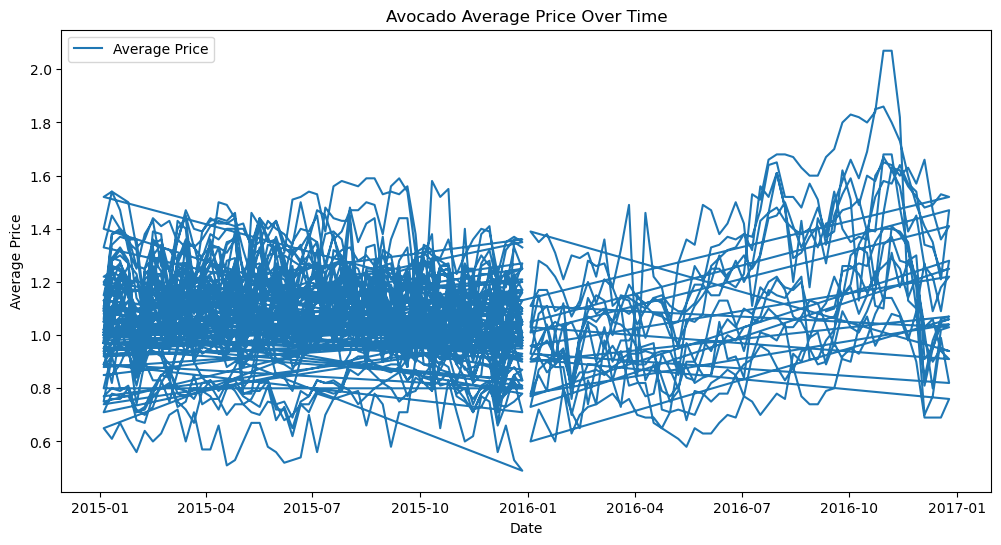

In [14]:
#Plot the time series
plt.figure(figsize=(12,6))
plt.plot(avocado_df_new, label='Average Price')
plt.title('Avocado Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

**Decompose the time series**

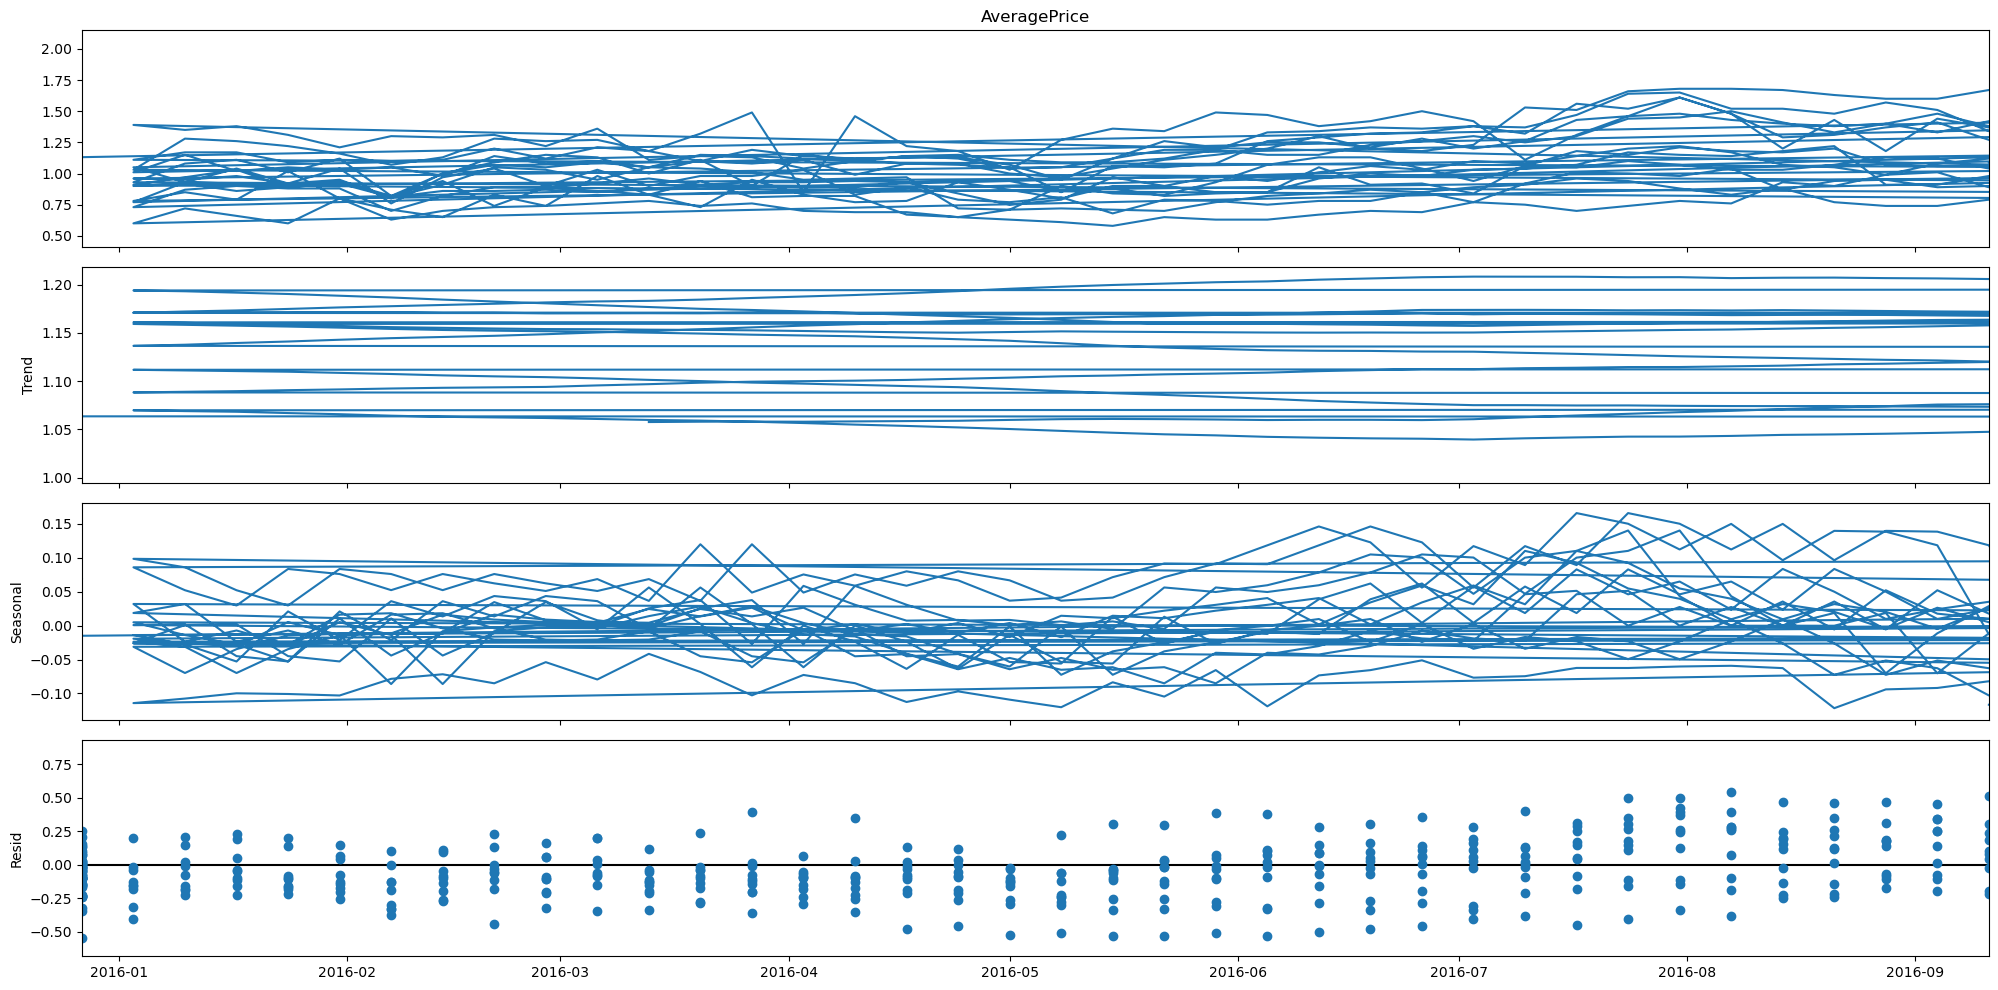

In [15]:
#decompose the time series to observe the trends, seasonality and residuals
decomposition = seasonal_decompose(avocado_df_new, model='additive', period=365)
#plot the decomposition
plt.rcParams['figure.figsize'] = (20, 10)  # Adjust width and height as desired
decomposition.plot()
plt.show()

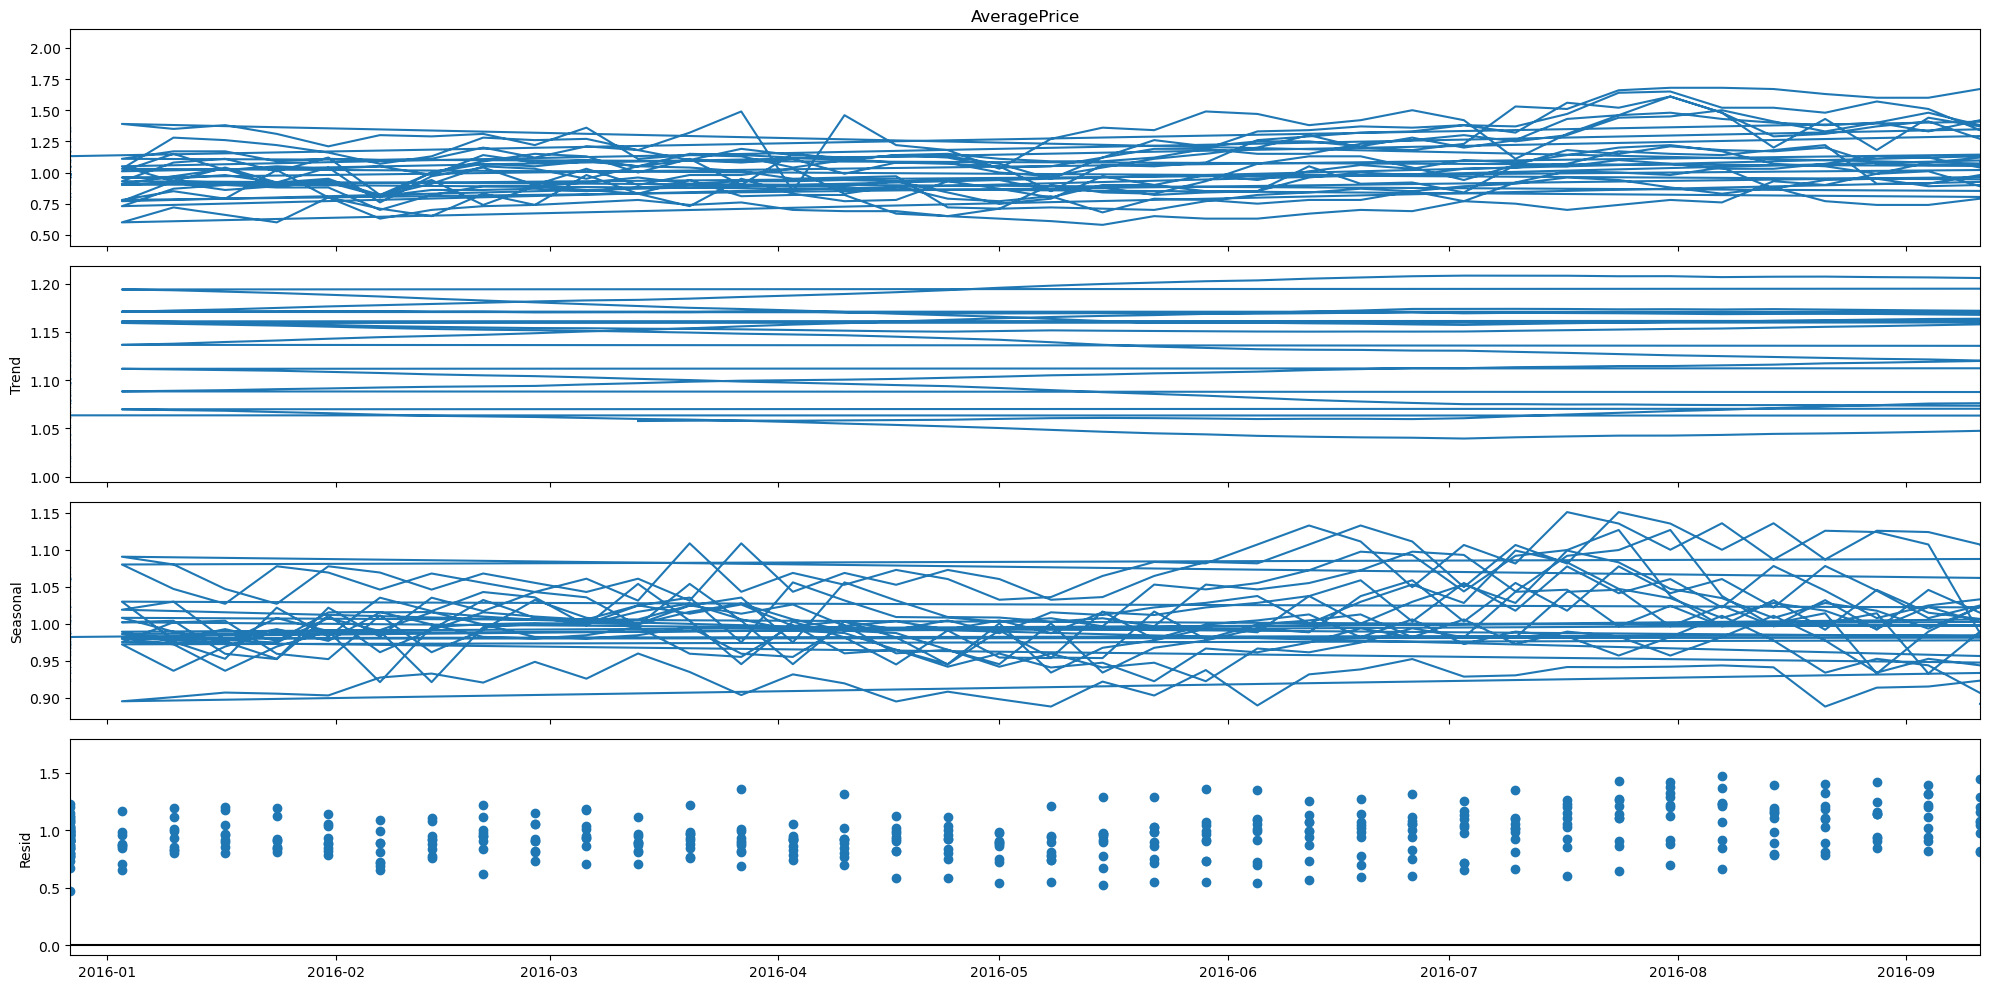

In [16]:
#decompose the time series to observe the trends, seasonality and residuals
decomposition = seasonal_decompose(avocado_df_new, model='multiplicative', period=365)
#plot the decomposition
plt.rcParams['figure.figsize'] = (20, 10)  # Adjust width and height as desired
decomposition.plot()
plt.show()

**Test For Stationarity**

In [17]:
dftest= adfuller(avocado_df_new,autolag='AIC') ## augmented-dickey fuller test

print("1. ADF : ",dftest[0])
print("2. P-value : ",dftest[1])
print("3. Num of lags : ",dftest[2])
print("4. Num of observations Used for ADF Regression and Critical values Calculation:",dftest[3])
print("5. Critical values:",)
for key ,val in dftest[4].items():
  print("\t",key,":",val)

1. ADF :  -7.787482174367679
2. P-value :  8.10676094330021e-12
3. Num of lags :  30
4. Num of observations Used for ADF Regression and Critical values Calculation: 3469
5. Critical values:
	 1% : -3.4322364645313335
	 5% : -2.862373532387402
	 10% : -2.567213704163575


In [18]:
#interpret the results
if dftest[1] <= 0.05:
  print("Time Series Data is Stationary")
else:
  print("Time Series Data is Non-Stationary, Differencing is required")

Time Series Data is Stationary


In [19]:
## Time Series Data is stationary already hence no differencing required

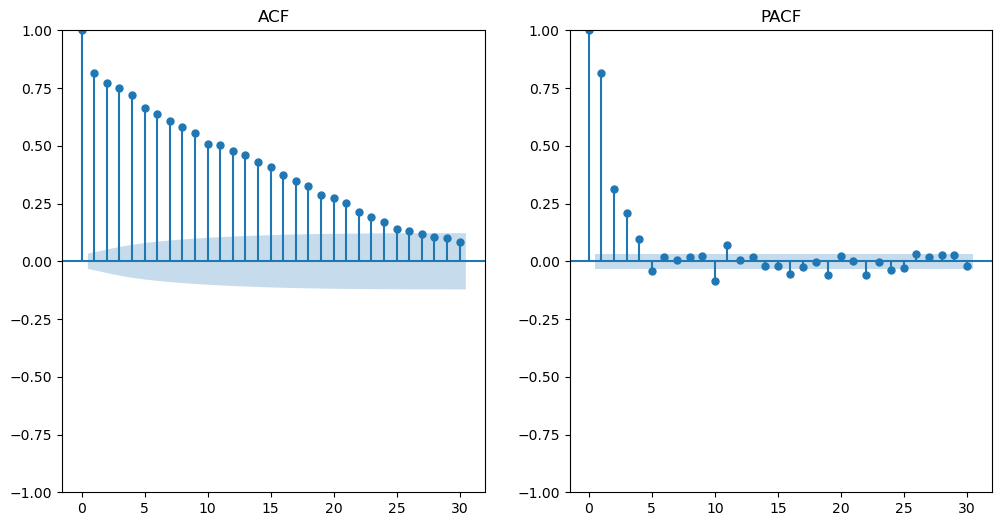

In [22]:
#plot ACF and PACF on original data
fig, ax = plt.subplots(1, 2, figsize=(12,6))
plot_acf(avocado_df_new, ax=ax[0], lags=30, title='ACF')
plot_pacf(avocado_df_new, ax=ax[1], lags=30, title='PACF')
plt.show()

In [40]:
len(avocado_df_new)

3500

In [41]:
len(test_data)

700

In [42]:
# Split data into training and testing sets
train_data = avocado_df_new[:int(0.8 * len(avocado_df_new))]  # 80% for training
test_data = avocado_df_new[int(0.8 * len(avocado_df_new)):]    # 20% for testing

**Auto Regression Model**

In [69]:
model=AutoReg(train_data,lags=4)


In [70]:
model_fit = model.fit()
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:           AveragePrice   No. Observations:                 2800
Model:                     AutoReg(4)   Log Likelihood                2546.535
Method:               Conditional MLE   S.D. of innovations              0.097
Date:                Wed, 09 Apr 2025   AIC                          -5081.071
Time:                        23:40:47   BIC                          -5045.455
Sample:                             4   HQIC                         -5068.214
                                 2800                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0979      0.013      7.435      0.000       0.072       0.124
AveragePrice.L1     0.3535      0.019     18.991      0.000       0.317       0.390
AveragePrice.L2     0.1683      

In [71]:
pred=model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)
pred.index = test_data.index 


In [72]:
pred

Date
2015-02-22    0.825679
2015-02-15    0.817345
2015-02-08    0.831752
2015-02-01    0.851724
2015-01-25    0.856932
                ...   
2016-10-09    1.076110
2016-10-02    1.076110
2016-09-25    1.076110
2016-09-18    1.076110
2016-09-11    1.076110
Length: 700, dtype: float64

In [73]:
rmse=np.sqrt(mean_squared_error(test_data,pred))

In [74]:
rmse

0.2813779062756802

In [75]:
print(len(pred))

700


In [76]:
print(len(test_data))

700


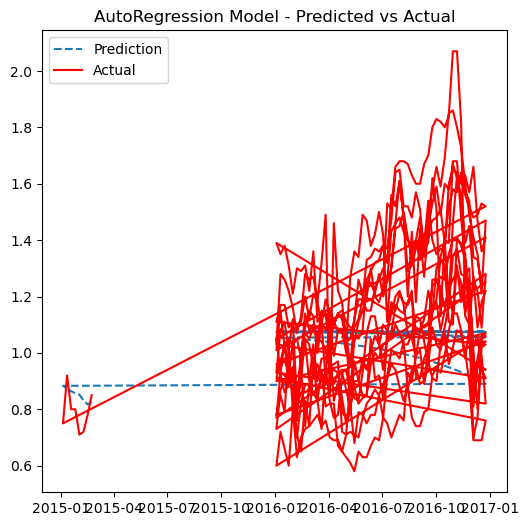

Date
2015-02-22    0.825679
2015-02-15    0.817345
2015-02-08    0.831752
2015-02-01    0.851724
2015-01-25    0.856932
                ...   
2016-10-09    1.076110
2016-10-02    1.076110
2016-09-25    1.076110
2016-09-18    1.076110
2016-09-11    1.076110
Length: 700, dtype: float64


In [77]:
plt.figure(figsize=(6,6))
plt.plot(pred,label='Prediction',linestyle='dashed')
plt.plot(test_data,label='Actual',linestyle='solid',color='red')
plt.legend()
plt.title('AutoRegression Model - Predicted vs Actual')
plt.show()

## print predicted values
print(pred)

**Building Arima  Model**

In [78]:
# Build and fit the ARIMA model
model = ARIMA(train_data, order=(4,0,30)) #Order (p, d, q)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(start=len(train_data), end=len(avocado_df_new)-1)

# Evaluate the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.282


In [79]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                 2800
Model:                ARIMA(4, 0, 30)   Log Likelihood                2614.098
Date:                Wed, 09 Apr 2025   AIC                          -5156.196
Time:                        23:47:40   BIC                          -4942.451
Sample:                             0   HQIC                         -5079.042
                               - 2800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0776      0.023     47.133      0.000       1.033       1.122
ar.L1          0.3669      0.249      1.473      0.141      -0.121       0.855
ar.L2         -0.2596      0.264     -0.984      0.3

In [32]:
# Example: Forecast the next 30 days
forecast_steps = 30
ARIMA_forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean


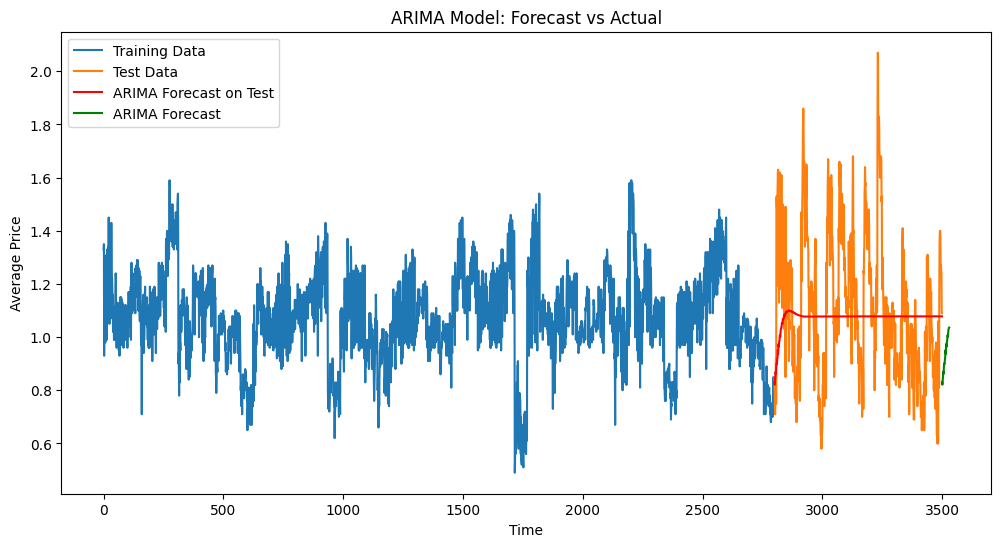

In [33]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_data)), train_data, label='Training Data')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test Data')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), predictions, label='ARIMA Forecast on Test', color='red')
#Plot of predictions on test data
plt.plot(range(len(train_data) + len(test_data), len(train_data) + len(test_data) + forecast_steps), ARIMA_forecast, label='ARIMA Forecast', color='green')
#Plot of forecasted values
plt.title('ARIMA Model: Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.legend()
plt.show()